
# Diabetes Health Indicators Dataset

The purpose of this code notebook is to clean and prepare the BRFSS data into a useable format to predict the accuracy if a person might have diabetes or is at risk of diabetes by finding out what risk factors are the most predictive of diabetic risk.

The dataset is from kaggle. This project will be using only the diabetes_binary_5050split_health_indicators_BRFSS2015.csv. This is a clean dataset of 70692 survey responses to CDC's BRFSS2015. It has a 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classs. 0 is for no diabetes and 1 is for prediabetes or diabetes. It has 22 feature variables and is balanced.

Based on the diabetes disease research regarding factors influencing diabetes disease and other chronic health conditions, only select features are included in this analysis.

Research in the field has identified the following as important risk factors for diabetes and other chronic illnesses like heart disease. The following are the selected subset of features from BRFSS 2015.

- diabetes binary (0 = no diabetes; 1 = prediabetes/diabetes)
- high blood pressure (0 = no high BP; 1 = high BP)
- high cholesterol (0 = no high cholesterol; 1 = high cholesterol)
- cholesterol check (0 = no choesterol check in 5 years; 1 = yes cholesterol check in 5 years)
- BMI (body mass index)
- smoker (smoke at least 100 cigarettes in entire life; 5 packs = 100 cigarettes; 0 = no; 1 = yes)
- stroke (ever told had a stroke; 0 = no; 1 = yes)
- heart disease or attack (coronary heart disease(CHD) or myocardial infarction(MI); 0 = no; 1 = yes)
- physical activity (in past 30 days not including job; 0 = no; 1 = yes))
- fruits (consumed 1 or more times per day; 0 = no; 1 = yes)
- veggies (consumed 1 or more times per day; 0 = no; 1 = yes)
- heavy alcohol consumption (adult men =>14 drinks per week; adult women =>7 drinks per week; 0 = no; 1 = yes)
- any healthcare (any kind of healthcare coverage including health insurance, prepaid plans (HMO etc); 0 = no; 1 = yes)
- no doctor because of cost (past 12 months when needed to see doctor but could not because of cost; 0 = no; 1 = yes)
- general health (general health 5 scale; 1 = excellent; 2 = very good; 3 = good; 4 = fair; 5 = poor)
- mental health (days of poor mental health 1-30 days)
- physical health (physical illness or injury days in past 30 days scale of 1-30)
- difficulty walking (have serious difficulty walking or climbing stairs; 0 = no; 1 = yes)
- sex (0 = female; 1 = male)
- age (14 level age category; 1 = 18-24; 2 = 25-29; 3 = 30-34; 4 = 35-39; 5 = 40-44; 6 = 45-49; 7 = 50-54; 8 = 55-59; 9 = 60-64; 10 = 65-69; 11 = 70-74; 12 = 75-79; 13 = 80 or>; 14 = not know/not sure/refused/missing)
- education (scale 1-6, 9); 1 = never attended school or only kindergarten; 2 = elementary; 3 = some high school; 4 = high school graduate; 5 = some college; 6 = college graduate or more; 9 = refused)
- income (scale 1-8; 1 = <10K; 2 = <15K; 3 = <20K; 4 = <25K; 5 = <35K; 6 = <50K; 7 = <75K; 8 = >75K or more; 77 = not know/not sure; 99 = refused)
  
The selected subset of features (columns from the dataset) from BRFSS 2015 was further investigated for additional information in order to understand the meaning of the data gathered from the BRFSS 2015 codebook from the survey.

Additional information about the BRFSS 2015 codebook and relevant paper are as follows:

BRFSS 2015 Codebook: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

Relevant Research Paper using BRFSS for Diabetes ML: https://www.cdc.gov/pcd/issues/2019/19_0109.html

## PART FOUR

## MODELING

In this section:

The goal of the modeling step is to develop a final model that effectively predicts the stated goal in the problem identification section. 

#### Remember the question we are trying to answer: Finding out what risk factors are the most predictive of diabetic risk.

Modeling Tasks:

1. Fit the models with the training dataset.
   Try a number of different models and compare outputs in the model evaluation stage.
   Use hyperparameter tuning methods like cross validation.
2. Review model outcomes and iterate over additional models as needed.                                                        Use a standard model evaluation metrics such as accuracy, recall, precision and F1.
3. Identify the final model that is the best model for the project.
   Hint: the most powerful model is not always the best one to use. 
   Consider computational complexity, scalability and maintenance cost.

   

In [1]:
# Imports
import os
import pandas as pd
import numpy as np
import glob
import random
random.seed(1)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame

from colorama import Fore, Back, Style
import statsmodels.stats.weightstats as ws
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split


In [ ]:
#Other Imports
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

This is the best place to put all the libraries needed for the project.

In [2]:
#read in the dataset (select 2015)
brfss2015_dataset = pd.read_csv('BRFSSdata/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

The dataset is imported from the source: kaggle using the pd.read_csv.

In [3]:
#use replace NaN with empty string using replace()function [df.replace(np.nan, '' or '-')]
data = brfss2015_dataset.apply(pd.value_counts).T
data.replace(np.nan, '-')

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,82.0,83.0,84.0,85.0,86.0,87.0,89.0,92.0,95.0,98.0
Diabetes_binary,35346.0,35346.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
HighBP,30860.0,39832.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
HighChol,33529.0,37163.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
CholCheck,1749.0,68943.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
BMI,-,-,-,-,-,-,-,-,-,-,...,11.0,1.0,13.0,1.0,1.0,13.0,4.0,9.0,4.0,4.0
Smoker,37094.0,33598.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
Stroke,66297.0,4395.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
HeartDiseaseorAttack,60243.0,10449.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
PhysActivity,20993.0,49699.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
Fruits,27443.0,43249.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


NaN values or '-' are not applicable, most of the values are 0 and 1 representing yes/no values.

In [4]:
df =brfss2015_dataset.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

There  are 22 columns in the dataset. Some of the features consist of zeros and ones. Some needs to be aggregated into smaller number of categories.

From the previous EDA done. For PhysHlth and MentHlth, we are aggregating into smaller number of categories for eventual one-hot encoding.

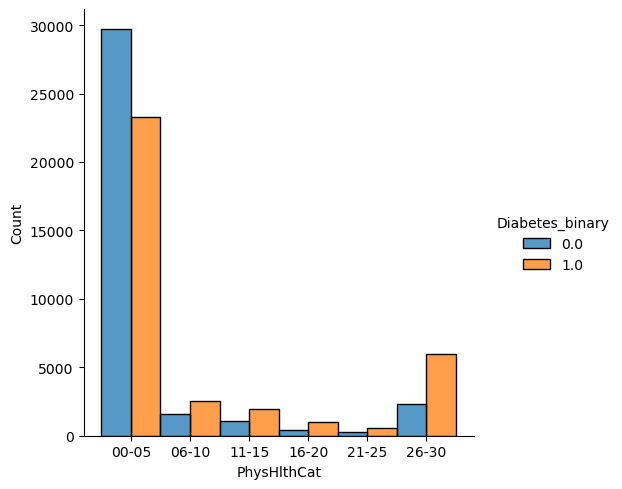

In [5]:
#Aggregated categories of PhysHlt; Simplified categories from 30 to 6 categories within a single data
df['PhysHlthCat'] = '00-05'
df['PhysHlthCat'] = np.where(((df['PhysHlth'] >= 6) & (df['PhysHlth'] <= 10)) , '06-10', df['PhysHlthCat'])
df['PhysHlthCat'] = np.where(((df['PhysHlth'] >= 11) & (df['PhysHlth'] <= 15)) , '11-15', df['PhysHlthCat'])
df['PhysHlthCat'] = np.where(((df['PhysHlth'] >= 16) & (df['PhysHlth'] <= 20)) , '16-20', df['PhysHlthCat'])
df['PhysHlthCat'] = np.where(((df['PhysHlth'] >= 21) & (df['PhysHlth'] <= 25)) , '21-25', df['PhysHlthCat'])
df['PhysHlthCat'] = np.where(((df['PhysHlth'] >= 26) & (df['PhysHlth'] <= 30)) , '26-30', df['PhysHlthCat'])
df.sort_values(by=['PhysHlthCat'], inplace=True)
df.drop(labels='PhysHlth', axis=1, inplace=True)
sns.displot(df, x='PhysHlthCat', hue='Diabetes_binary', multiple="dodge")
plt.show()

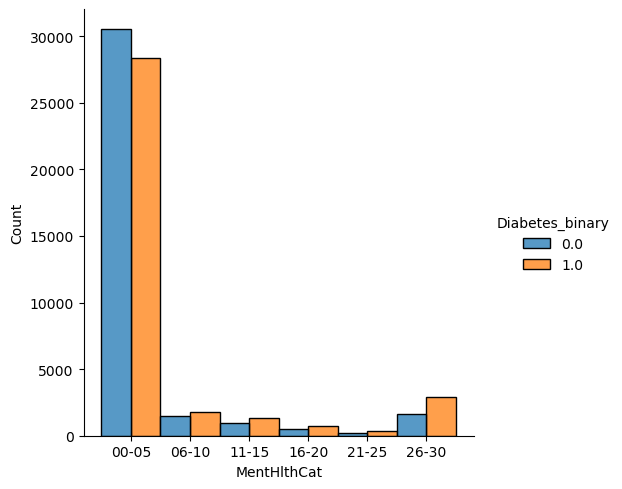

In [6]:
#Aggregated categories of MentHlt; Simplified categories from 30 to 6 categories within a single data
df['MentHlthCat'] = '00-05'
df['MentHlthCat'] = np.where(((df['MentHlth'] >= 6) & (df['MentHlth'] <= 10)) , '06-10', df['MentHlthCat'])
df['MentHlthCat'] = np.where(((df['MentHlth'] >= 11) & (df['MentHlth'] <= 15)) , '11-15', df['MentHlthCat'])
df['MentHlthCat'] = np.where(((df['MentHlth'] >= 16) & (df['MentHlth'] <= 20)) , '16-20', df['MentHlthCat'])
df['MentHlthCat'] = np.where(((df['MentHlth'] >= 21) & (df['MentHlth'] <= 25)) , '21-25', df['MentHlthCat'])
df['MentHlthCat'] = np.where(((df['MentHlth'] >= 26) & (df['MentHlth'] <= 30)) , '26-30', df['MentHlthCat'])
df.sort_values(by=['MentHlthCat'], inplace=True)
df.drop(labels='MentHlth', axis=1, inplace=True)
sns.displot(data=df, x='MentHlthCat', hue='Diabetes_binary', multiple="dodge")
plt.show()

We assessed that majority of the data are binary and are categorical data.
We will create dummy or indicator features for categorical data.

In [7]:
# OneHotEncoding of the categorical data
df_new = pd.get_dummies(df, columns=['GenHlth', 'MentHlthCat', 'PhysHlthCat', 'Age', 'Education', 'Income'])
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,70692.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,70692.0,0.563458,0.495960,0.0,0.0,1.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
Stroke,70692.0,0.062171,0.241468,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0


The BMI data needs to undergo min/max scaling to make it consistent with the categorical data.

Scaling the BMI data to reduce the possible overemphasizing of the BMI data in the modeling.

In [8]:
#Scaling the data; Only BMI will get scaled due to the other columns are categorical and have zero and one values
cols=df_new.columns
# retrieve just the numeric input values
data = df_new.values[:, :]
# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
df_new = DataFrame(data)
df_new.set_axis(cols[:], axis=1, inplace=True)
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,70692.0,0.500000,0.500004,0.0,0.000000,0.500000,1.000000,1.0
HighBP,70692.0,0.563458,0.495960,0.0,0.000000,1.000000,1.000000,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.000000,1.000000,1.000000,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.000000,1.000000,1.000000,1.0
BMI,70692.0,0.207639,0.082720,0.0,0.151163,0.197674,0.244186,1.0
Smoker,70692.0,0.475273,0.499392,0.0,0.000000,0.000000,1.000000,1.0
Stroke,70692.0,0.062171,0.241468,0.0,0.000000,0.000000,0.000000,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.000000,0.000000,0.000000,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.000000,1.000000,1.000000,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.000000,1.000000,1.000000,1.0


Splitting in preparation to modeling.
Our y variable is Diabetes_binary

In [9]:
dfy = df_new['Diabetes_binary']
dfX = df_new.copy()
dfX.drop('Diabetes_binary', axis=1, inplace=True)
Xtrain, Xtest, ytrain, ytest = train_test_split(dfX, dfy,
                                                train_size = 0.80,
                                                random_state = 42)

In [10]:
#Import ML models:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
#from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
#from sklearn.learning_curve import validation_curve



#### My Dataset and Applying the Machine Learning models:

The diabetes dataset is a classification problem. Classification is a process of categorizing data or objects into predefined classes or categories based on their features or attributes.

The main objective of classification is to build a model that can accurately assign a label or category to a new observation based on its features. Classification is of two types: Binary and Multiclass. 

In binary classification, the goal is to classify the input into one of two classes or categories. In multi-class classification, the goal is to classify the input into one of several classes or categories.

In the diabetes dataset, we want to predict and determine whether the person has diabetes or not.

The dataset is a binary classification. We are interested in the RECALL measurement, because we would like ahigh positive conclusion even if it gives us  a large number of false positives. A high false positive rate would indicate that we consider someone who is diabetic who isn't. This can be resolved by additional medical testing. We prefer a high false postive rate as opposed to high false negative rate, due to the problems of not being diagnosed as at risk for diabetes.



#### Applying the Machine Learning models

Here are the following classification models I will be using:

    Logistic Regression
    K-Nearest Neighbor (KNN)
    Gradient Boost
    Support vector machine (SVM)
    Random Forest (entropy and gini)
    Naive Bayes
    

LOGISTIC REGRESSION

In [11]:
# Apply logistic regression model to training data
Logreg = LogisticRegression(penalty = 'l2',random_state = 40, max_iter=200)
Logreg.fit(Xtrain,ytrain)
   
# Predict using model
y_pred_lr = Logreg.predict(Xtest)
    
Accuracy_lr = accuracy_score(ytest,y_pred_lr)
print("Accuracy: "+str(Accuracy_lr))
Recall_lr = recall_score(ytest,y_pred_lr)
print("Recall: "+str(Recall_lr))
F1_lr = f1_score(ytest,y_pred_lr)
print("F1: "+str(F1_lr))

Accuracy: 0.7485677912157861
Recall: 0.7747252747252747
F1: 0.7557204700061844


K-NEAREST NEIGHBOR (KNN)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import plot_roc_curve

# Apply KNN model to training data:

knn = KNeighborsClassifier()
knn.fit(Xtrain,ytrain)

# Predict using model:

y_predict_knn=knn.predict(Xtest)

Accuracy_knn = accuracy_score(ytest,y_predict_knn)
print("Accuracy: "+str(Accuracy_knn))
Recall_knn = recall_score(ytest,y_predict_knn)
print("Recall: "+str(Recall_knn))
F1_knn = f1_score(ytest,y_predict_knn)
print("F1: "+str(F1_knn))

#knn_disp= plot_roc_curve(knn,X_test,y_test)

Accuracy: 0.7047881745526557
Recall: 0.7280924204001127
F1: 0.7123363197794624


RANDOM FOREST (ENTROPY MODEL)

In [13]:
from sklearn.ensemble import RandomForestClassifier

#Apply RF to the training data:

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy')
rf.fit(Xtrain, ytrain)

#Predict using the model:

y_predict_rf = rf.predict(Xtest)

Accuracy_rf = accuracy_score(ytest,y_predict_rf)
print("Accuracy: "+str(Accuracy_rf))
Recall_rf = recall_score(ytest,y_predict_rf)
print("Recall: "+str(Recall_rf))
F1_rf = f1_score(ytest,y_predict_rf)
print("F1: "+str(F1_rf))

Accuracy: 0.733078718438362
Recall: 0.7741617357001972
F1: 0.7443782172852884


RANDOM FOREST (GINI IMPURITY MODEL)

In [14]:
from sklearn.ensemble import RandomForestClassifier

#Apply RF to the training data:

rf2 = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='gini')
rf2.fit(Xtrain, ytrain)

#Predict using the model:

y_predict_rf2 = rf2.predict(Xtest)

Accuracy_rf2 = accuracy_score(ytest,y_predict_rf2)
print("Accuracy: "+str(Accuracy_rf))
Recall_rf2 = recall_score(ytest,y_predict_rf2)
print("Recall: "+str(Recall_rf2))
F1_rf2 = f1_score(ytest,y_predict_rf2)
print("F1: "+str(F1_rf2))

Accuracy: 0.733078718438362
Recall: 0.7727528881375035
F1: 0.7427217332430605


GRADIENT BOOSTING

In [15]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier

In [16]:
gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
gbc.fit(Xtrain, ytrain)

#Predict using the model:

y_predict_gbc = gbc.predict(Xtest)

Accuracy_gbc = accuracy_score(ytest,y_predict_gbc)
print("Accuracy: "+str(Accuracy_gbc))
Recall_gbc = recall_score(ytest,y_predict_gbc)
print("Recall: "+str(Recall_gbc))
F1_gbc = f1_score(ytest,y_predict_gbc)
print("F1: "+str(F1_gbc))

Accuracy: 0.7518212037626424
Recall: 0.7948717948717948
F1: 0.7627932130061515


NAIVE BAYES

In [17]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(Xtrain,ytrain)

#Predict using the model:

y_predict_nb=nb.predict(Xtest)

Accuracy_nb = accuracy_score(ytest,y_predict_nb)
print("Accuracy: "+str(Accuracy_nb))
Recall_nb = recall_score(ytest,y_predict_nb)
print("Recall: "+str(Recall_nb))
F1_nb = f1_score(ytest,y_predict_nb)
print("F1: "+str(F1_nb))

Accuracy: 0.7086073979772262
Recall: 0.7269653423499577
F1: 0.7146814404432134


SUPPORT VECTOR MACHINE (SVM):

In [18]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(Xtrain, ytrain)

# Predict using model:

y_predict_svm=svm.predict(Xtest)

Accuracy_svm = accuracy_score(ytest,y_predict_svm)
print("Accuracy: "+str(Accuracy_svm))
Recall_svm = recall_score(ytest,y_predict_svm)
print("Recall: "+str(Recall_svm))
F1_svm = f1_score(ytest,y_predict_svm)
print("F1: "+str(F1_svm))

Accuracy: 0.7492043284532145
Recall: 0.7886728655959425
F1: 0.7594627594627594


#### Comparison of the models:

This shows that Gradient Boost and SVM are the top two best performing models. Both of the models are ensembled, based on decision trees.

We will perform a grid search CV as hyperparameter tuning for the two ML models.


In [19]:
myLabels = ['Logistic Regression', 'KNN', 'SVM','Random Forest(entropy)','Random Forest(gini)','Gradient Boost', 'Naive Bayes']
Accuracy_score = [Accuracy_lr,Accuracy_knn,Accuracy_svm,Accuracy_rf,Accuracy_rf2,Accuracy_gbc,Accuracy_nb]
Recall_score = [Recall_lr,Recall_knn,Recall_svm,Recall_rf,Recall_rf2,Recall_gbc,Recall_nb]
F1_score = [F1_lr,F1_knn,F1_svm,F1_rf,F1_rf2,F1_gbc,F1_nb]

score_tab = pd.DataFrame(list(zip(myLabels, Accuracy_score, Recall_score, F1_score)), 
               columns =['Algorithm', 'Accuracy score', 'Recall score', 'F1 score']) 

print(score_tab.sort_values('Recall score', ascending=False))

                Algorithm  Accuracy score  Recall score  F1 score
5          Gradient Boost        0.751821      0.794872  0.762793
2                     SVM        0.749204      0.788673  0.759463
0     Logistic Regression        0.748568      0.774725  0.755720
3  Random Forest(entropy)        0.733079      0.774162  0.744378
4     Random Forest(gini)        0.731240      0.772753  0.742722
1                     KNN        0.704788      0.728092  0.712336
6             Naive Bayes        0.708607      0.726965  0.714681


#### Visualization of the different models based on the RECALL SCORES

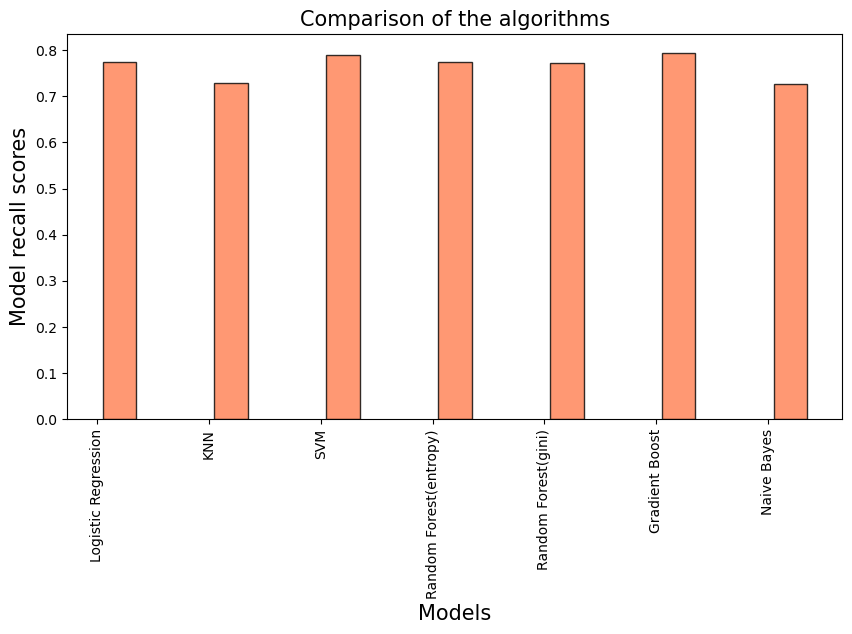

In [32]:
#plotting the recall scores:

index=[1,2,3,4,5,6,7]
index_rec=[1.2,2.2,3.2,4.2,5.2,6.2,7.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Model recall scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
#patterns = [ "/"]
_=plt.bar(index_rec,Recall_score,color='coral',alpha=0.8,label='Recall score',edgecolor='k',width=0.3)
plt.xticks([1, 2,3,4,5,6,7], myLabels, rotation=90)
#plt.legend()
plt.savefig("26.png")
plt.show()

#### Applying Grid search CV for hyperparameter Tuning:

Parameter Tuning for Gradient Boost:

In [35]:
from sklearn.model_selection import GridSearchCV

# Results captured below.  Commenting out to reduce recalculation of the workbook.

#GB = GradientBoostingClassifier()
#gb_param = {
#    'subsample': [0.8],
#    'learning_rate': [0.04, 0.05, 0.06], 
#    'n_estimators': [140, 160, 180], 
#    'random_state': [5], 
#    'max_depth': [8, 9, 10], 
#    'max_leaf_nodes': [90, 100, 110]
#}

#gsGB = GridSearchCV(GB, param_grid = gb_param, cv=3, scoring="recall", n_jobs= -1, verbose = 1)
#gsGB.fit(Xtrain,ytrain)
#print(gsGB.best_estimator_)
#print(gsGB.best_score_)

```
Results:
    
Fitting 3 folds for each of 81 candidates, totalling 243 fits
GradientBoostingClassifier(learning_rate=0.04, max_depth=9, max_leaf_nodes=90,
                           n_estimators=140, random_state=5, subsample=0.8)
0.7943217218918154
```


Fitting the Gradient Boost model with the optimal hyperparameters:

In [24]:
GB = GradientBoostingClassifier(learning_rate=0.04, max_depth=9, max_leaf_nodes=90,
                           n_estimators=140, random_state=5, subsample=0.8)

#Predict using the model:
GB.fit(Xtrain, ytrain)
y_predict_gbc = GB.predict(Xtest)

Accuracy_gbc = accuracy_score(ytest,y_predict_gbc)
print("Accuracy: "+str(Accuracy_gbc))
Recall_gbc = recall_score(ytest,y_predict_gbc)
print("Recall: "+str(Recall_gbc))
F1_gbc = f1_score(ytest,y_predict_gbc)
print("F1: "+str(F1_gbc))

Accuracy: 0.7518919301223566
Recall: 0.7945900253592562
F1: 0.7627806329456316


                Features  Importance scores
0                 HighBP           0.352958
3                    BMI           0.135629
16           GenHlth_2.0           0.075922
15           GenHlth_1.0           0.060004
1               HighChol           0.053260
13              DiffWalk           0.040600
6   HeartDiseaseorAttack           0.024102
17           GenHlth_3.0           0.020506
10     HvyAlcoholConsump           0.013285
18           GenHlth_4.0           0.012989
42              Age_11.0           0.011926
2              CholCheck           0.011582
58            Income_8.0           0.010814
14                   Sex           0.010537
34               Age_3.0           0.009000
44              Age_13.0           0.008868
35               Age_4.0           0.008616
41              Age_10.0           0.008177
43              Age_12.0           0.007663
33               Age_2.0           0.007118
36               Age_5.0           0.006851
19           GenHlth_5.0        

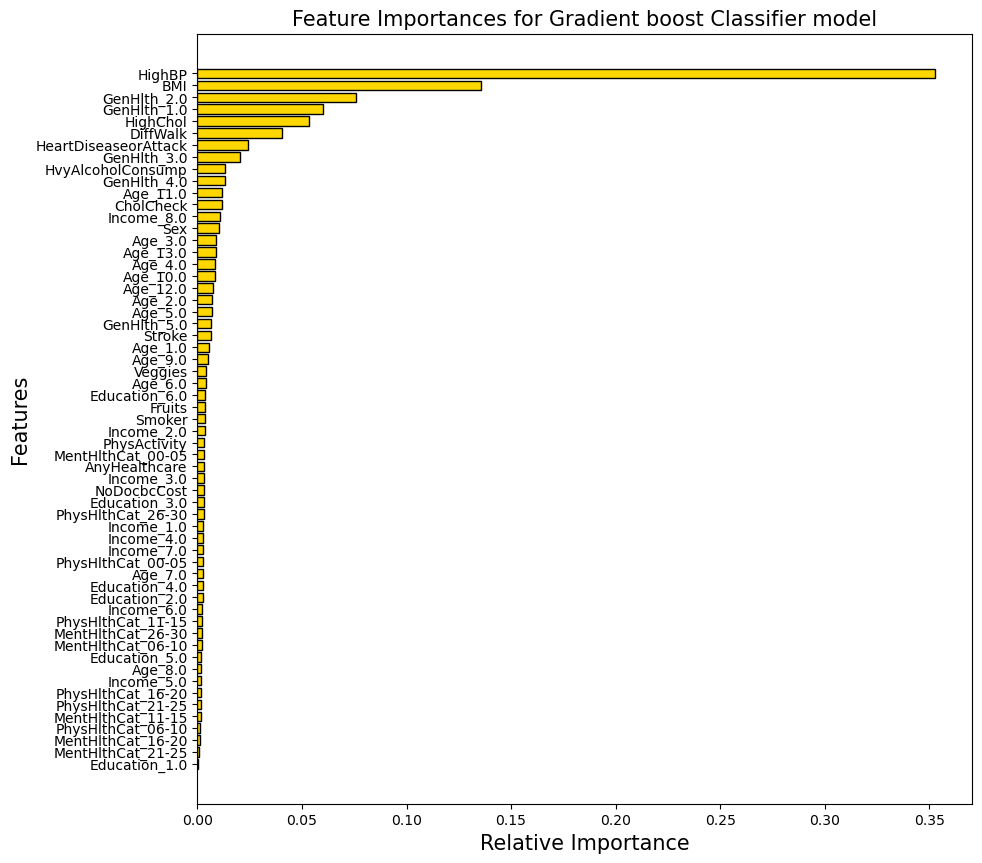

In [48]:
features = dfX
importances = list(GB.feature_importances_)
#imp=np.sort(importances)


tab=pd.DataFrame(list(zip(dfX,importances)), columns=['Features','Importance scores']).sort_values(by=['Importance scores'], ascending=False)
 
print(tab)

#visually:
plt.figure(figsize=(10,10))
#indices = np.argsort(importances)
tab.sort_values(by=['Importance scores'], ascending=True, inplace=True)
indices = tab['Features'].values.tolist()
importances = tab['Importance scores'].values.tolist()
features = tab['Features'].values.tolist()
#index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
_=plt.barh(indices,importances, align='center',color='gold',edgecolor='k')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(indices, features)
plt.title('Feature Importances for Gradient boost Classifier model',fontsize=15)
plt.savefig("29.png")
plt.show()
#len(importances)



Parameter Tuning for SVM:

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC  

#commenting out to prevent rerunning.  Original time was a little over 3 days.  Results captured below.
# defining parameter range
#param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#              'kernel': ['rbf']} 
  
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
# grid.fit(Xtrain, ytrain)

```
Results:
    
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time= 8.1min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time= 8.3min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.623 total time= 9.2min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.623 total time= 8.3min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.628 total time= 7.8min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.736 total time= 5.0min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.739 total time= 5.0min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.738 total time= 5.2min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.744 total time= 5.1min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.737 total time= 5.0min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.733 total time= 5.5min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.743 total time= 5.8min
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.735 total time= 5.1min
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.744 total time= 5.3min
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.735 total time= 5.1min
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.726 total time= 6.5min
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.735 total time= 5.9min
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.727 total time= 6.0min
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.736 total time= 6.7min
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.729 total time= 5.8min
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.533 total time= 7.2min
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.532 total time= 7.6min
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.534 total time= 7.3min
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.533 total time= 7.8min
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.533 total time= 7.5min
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.705 total time=15.9min
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.705 total time=14.9min
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.701 total time=15.1min
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.702 total time=16.6min
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.698 total time=17.6min
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.743 total time= 6.3min
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.745 total time= 6.1min
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.744 total time= 6.1min
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.749 total time= 6.4min
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.741 total time= 6.6min
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.745 total time= 5.5min
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.748 total time= 5.4min
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.744 total time= 5.5min
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.755 total time= 5.5min
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.741 total time= 4.9min
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.733 total time= 5.8min
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.744 total time= 5.7min
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.735 total time= 5.9min
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.744 total time= 5.8min
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.734 total time= 5.8min
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.726 total time= 5.9min
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.736 total time= 6.9min
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.727 total time= 6.9min
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.736 total time= 6.0min
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.729 total time= 6.9min
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.691 total time=20.3min
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.696 total time=21.6min
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.693 total time=21.5min
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.696 total time=21.5min
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.689 total time=20.5min
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.738 total time=16.8min
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.734 total time=17.7min
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.737 total time=17.4min
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.738 total time=18.4min
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.734 total time=19.2min
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.745 total time= 5.4min
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.751 total time= 5.0min
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.744 total time= 5.1min
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.755 total time= 5.3min
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.744 total time= 5.5min
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.745 total time= 5.0min
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.751 total time= 5.4min
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.744 total time= 5.4min
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.751 total time= 5.5min
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.741 total time= 5.4min
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.733 total time= 5.8min
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.744 total time= 5.9min
[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.735 total time= 6.0min
[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.744 total time= 6.0min
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.734 total time= 5.5min
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.692 total time=23.1min
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.696 total time=23.6min
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.692 total time=23.8min
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.697 total time=23.3min
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.690 total time=23.2min
[CV 1/5] END .....C=100, gamma=0.1, kernel=rbf;, score=0.700 total time=140.0min
[CV 2/5] END .....C=100, gamma=0.1, kernel=rbf;, score=0.705 total time=120.9min
[CV 3/5] END .....C=100, gamma=0.1, kernel=rbf;, score=0.700 total time=142.8min
[CV 4/5] END .....C=100, gamma=0.1, kernel=rbf;, score=0.708 total time=129.8min
[CV 5/5] END .....C=100, gamma=0.1, kernel=rbf;, score=0.695 total time=136.0min
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.742 total time=11.1min
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.750 total time=11.6min
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.743 total time=11.2min
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.753 total time=11.1min
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.742 total time=11.3min
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.748 total time= 5.2min
[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.753 total time= 5.0min
[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.747 total time= 5.1min
[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.757 total time= 5.2min
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.743 total time= 4.9min
[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.746 total time= 5.5min
[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.751 total time= 5.1min
[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.744 total time= 5.2min
[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.752 total time= 5.3min
[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.741 total time= 5.1min
[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.689 total time=32.6min

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.688 total time=31.2min
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.686 total time=30.1min
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.692 total time=29.1min
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.686 total time=29.6min
[CV 1/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=0.668 total time=520.0min
[CV 2/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=0.676 total time=476.5min
[CV 3/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=0.668 total time=474.9min
[CV 4/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=0.680 total time=582.5min
[CV 5/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=0.666 total time=642.6min
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.745 total time=73.0min
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.745 total time=73.8min
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.744 total time=71.7min
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.751 total time=68.5min
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.742 total time=68.4min
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.745 total time=10.4min
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.751 total time=10.9min
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.744 total time=10.2min
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.756 total time=11.0min
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.746 total time=10.5min
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.748 total time= 5.5min
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.756 total time= 5.1min
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.746 total time= 5.5min
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.754 total time= 5.6min
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.744 total time= 5.1min

GridSearchCV

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

estimator: SVC

SVC()

SVC

S
```

In [27]:
# print best parameter after tuning
#print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
#print(grid.best_estimator_)

```
Best Estimator Results
{'`C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.001)
```

In [28]:
from sklearn.metrics import classification_report
#grid_predictions = grid.predict(Xtest)
  
# print classification report
#print(classification_report(ytest, grid_predictions))

```
Results

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      7041
         1.0       0.73      0.79      0.76      7098

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

```

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC  

 
svc = SVC(C=100, gamma=0.001, kernel='rbf')
  
#Predict using the model:
svc.fit(Xtrain, ytrain)

y_predict_svc = svc.predict(Xtest)

Accuracy_svc = accuracy_score(ytest,y_predict_svc)
print("Accuracy: "+str(Accuracy_svc))
Recall_svc = recall_score(ytest,y_predict_svc)
print("Recall: "+str(Recall_svc))
F1_svc = f1_score(ytest,y_predict_svc)
print("F1: "+str(F1_svc))

Accuracy: 0.7477898012589292
Recall: 0.7945900253592562
F1: 0.7598006196955409


#!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

forward_fs_best=sfs(estimator = svc, k_features = 'best', forward = True,verbose = 1, scoring = 'r2')
sfs_forward_best=forward_fs_best.fit(Xtrain,ytrain)
print('R-Squared value:', sfs_forward_best.k_score_)

print(forward_fs_best.feature_names_to_select_)

TypeError: only size-1 arrays can be converted to Python scalars

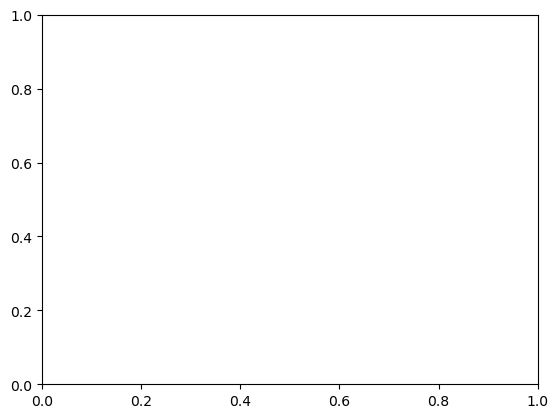

In [34]:
#If you're using rbf (Radial basis function) kernal, you can use sklearn.inspection.permutation_importance as follows to get feature importance. 

from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#svc =  SVC(kernel='rbf', C=2)
#svc.fit(X_train, y_train)

perm_importance = permutation_importance(svc, Xtest, ytest)

feature_names = dfX
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")




In [ ]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = ['input1', 'input2']
f_importances(svm.coef_, features_names)

(g) Determine if the model can be improved--repeat as needed with additional algorithms and/or by applying hyper-parameter tuning

It is common practice to show--when applicable--performance metrics for both the training set and the test set. This means that the model is fitted with the training set, and once fitted, predictions are generated using the training set and the test set, and the corresponding performance metrics are shown (as above), and analyzed.



Hint: consider tree-based algorithms such as Random Forest Classifiers. (*)

Since the model's training accuracy (0.89) is pretty good (meaning, close to 1--or 100%), then one says there is only a small "bias" in the model.

Since the model's test accuracy (0.81) is decently close to the training accuracy, we would say that there is a small "variance" between the training accuracy and the test accuracy. This is an indication that the model will "generalize well", which means that the model will be well-behaved when new data is presented to it.

Since the gap between training and testing accuracy is about 8%, one might say that the model is slightly over-fitting the data. Thus, in general, one says that a model is over-fitting (or just overfitting), when there is an important gap between its training performance and its test performance.

Notice two points of nuance in the definition of overfitting: (a) the quantification of important depends on the application; and (b) the comparison of training versus test performance can be done (in many cases) across mulriple performance metrics

These properties are important and desirable.

In this particular case study, however, there are two possible avenues that we might want to investigate:

    Whether the mild imbalance in the dataset might be affecting the algorithm (and thus the model computed with it.)

    Whether the observed mild overfitting can be diminished


#### SUMMARY

My Dataset and Applying the Machine Learning models:

We have established that my diabetes dataset is a classification problem. Classification is a process of categorizing data or objects into predefined classes or categories based on their features or attributes.

The main objective of classification is to build a model that can accurately assign a label or category to a new observation based on its features. Classification is of two types: Binary and Multiclass.

In binary classification, the goal is to classify the input into one of two classes or categories. In multi-class classification, the goal is to classify the input into one of several classes or categories.

My dataset is a health condition which is diabetes, that I want to predict and determine whether the person has a certain disease or not. My dataset is a binary classification.

I am interested in the RECALL measure of my dataset since it considers people who are false negatives that may have been positive to the health condition being measured.

Recall measures the effectiveness of a classification model in identifying all relevant instances from a dataset. It is the ratio of the number of true positive (TP) instances to the sum of true positive and false negative (FN) instances.

Recall is defined as ratio of the number of retrieved and relevant documents(the number of items retrieved that are relevant to the user and match his needs) to the number of possible relevant documents(number of relevant documents in the database).



The Machine Learning models:

The following classification models were used in the diabetes dataset:

    Logistic Regression
    K-Nearest Neighbor (KNN)
    Support vector machine (SVM)
    Random Forest (entropy model)
    Random Forest (gini impurity model)
    Naive Bayes
    Gradient Boost

From the table presented, the top two performing models were:
   Gradient Boost
   SVM/SVC
   
Gradient Boost and SVM

What is the difference between SVM and SVC?
The limitation of SVC is compensated by SVM non-linearly. And that's the difference between SVM and SVC. If the hyperplane classifies the dataset linearly then the algorithm we call it as SVC and the algorithm that separates the dataset by non-linear approach then we call it as SVM.
What is SVC model used for?
SVM Classifier using Sklearn: Code Examples - Data Analytics
SVC, or Support Vector Classifier, is a supervised machine learning algorithm typically used for classification tasks. SVC works by mapping data points to a high-dimensional space and then finding the optimal hyperplane that divides the data into two classes

Evaluating the performance of a model by training and testing on the same dataset can lead to the overfitting. Hence the model evaluation is based on splitting the dataset into train and validation set. But the performance of the prediction result depends upon the random choice of the pair of (train,validation) set. 

To overcome that, the Cross-Validation procedure is used where under the k-fold CV approach, the training set is split into k smaller sets, where a model is trained using k-1 of the folds as training data and the model is validated on the remaining part.

